<a href="https://colab.research.google.com/github/khanhuzaif348/machine_learning_model-/blob/main/LogisticsRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistics Regression -  

- Logistics Regression Used for Classification Problem ,
 used as Linear Regression , Starts with linear Combination

 z=b0+b1x1+b2x2+⋯+bnxn

where:
- z = linear score

- b0= intercept (bias)

- bi ​= coefficients (weights)

- 𝑥𝑖= features



In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , mean_squared_error , classification_report

In [112]:
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
#preprocess the Dataset

In [ ]:
# drop deck column
df.drop('deck',axis=1,inplace=True)


In [ ]:
#Impute Missing VCalues
df.isnull().sum().sort_values(ascending=False)

,0
age,177
embarked,2
embark_town,2
sex,0
pclass,0
survived,0
parch,0
sibsp,0
class,0
fare,0


In [ ]:
# Impute Missing value of Age with mean , emaraked,emabarked_town with mode 0
df['age'] = df['age'].fillna(df['age'].median())
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode([0]))
df['embarked'] =  df['embarked'].fillna(df['embarked'].mode()[0])
# impute missing values


In [ ]:
# drop rows with NaN in that column
df.dropna(subset=['embark_town'], inplace=True)


In [ ]:
# just look for missing values
df.isnull().sum().sort_values(ascending=False)

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   age          889 non-null    float64 
 4   sibsp        889 non-null    int64   
 5   parch        889 non-null    int64   
 6   fare         889 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        889 non-null    category
 9   who          889 non-null    object  
 10  adult_male   889 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        889 non-null    object  
 13  alone        889 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 86.1+ KB


In [ ]:
#encode th data set
for col in df.columns:
  if df[col].dtype=='object' or df[col].dtype=='category':
    df[col] = LabelEncoder().fit_transform(df[col])

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [ ]:
x= df.iloc[:,1:]
y=df['survived']

In [ ]:
x_train,x_test ,y_train,y_test  = train_test_split(x,y,test_size=0.2 , random_state=42)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print('Classification report ',classification_report(y_test,y_pred))

Classification report                precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00        69

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



In [ ]:
cm = confusion_matrix(y_test,y_pred)

<Axes: >

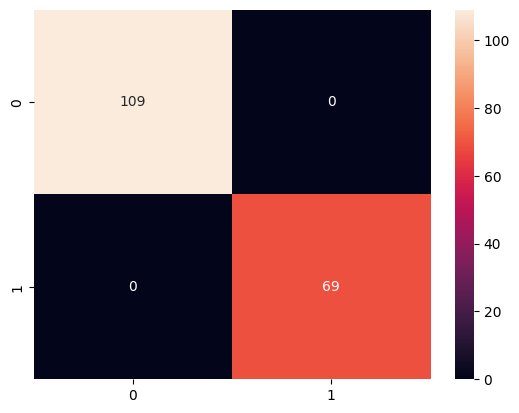

In [ ]:
sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
#Lets try to find the why model shows Overfitting

In [ ]:
 print(df.corr()['survived'].sort_values(ascending=False))


survived       1.000000
who            0.323191
fare           0.255290
parch          0.083151
sibsp         -0.034040
age           -0.069822
embarked      -0.169718
embark_town   -0.169718
alone         -0.206207
pclass        -0.335549
class         -0.335549
sex           -0.541585
adult_male    -0.555520
Name: survived, dtype: float64


Yeh , I see alive are Correlted to survived , that's why Overfitting of Model

In [ ]:
survived       1.000000
alive          1.000000
# ok I drop the alive column because it is shows the strong correlation


In [ ]:
# lets drop alive column because its shows the strong correlation
df.drop('alive',axis=1,inplace=True)

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2,1,1,True,2,True
887,1,1,0,19.0,0,0,30.0000,2,0,2,False,2,True
888,0,3,0,28.0,1,2,23.4500,2,2,2,False,2,False
889,1,1,1,26.0,0,0,30.0000,0,0,1,True,0,True


In [ ]:
x_new=df.iloc[:,1:]
y_new = df['survived']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x_new,y_new,test_size=0.2,random_state=42)

In [ ]:
modelnew = LogisticRegression()
modelnew.fit(X_train,Y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_predictnew = modelnew.predict(X_test)

<Axes: >

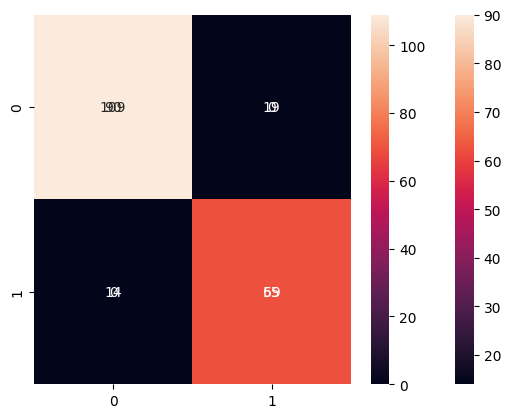

In [ ]:
sns.heatmap(confusion_matrix(Y_test,y_predictnew),annot=True)

sns.heatmap(cm,annot=True,fmt='d')

In [ ]:
print(classification_report(Y_test,y_predictnew))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.74      0.80      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178



In [ ]:
#save the Model
import pickle as pkl

In [ ]:
pkl.dump(modelnew,open('LogisticsRegTitanic.pkl','wb'))
print("Done ")

Done 


In [ ]:
model = pkl.load(open("/content/LogisticsRegTitanic.pkl",'rb'))

------ ---------------------- ------  ----------------


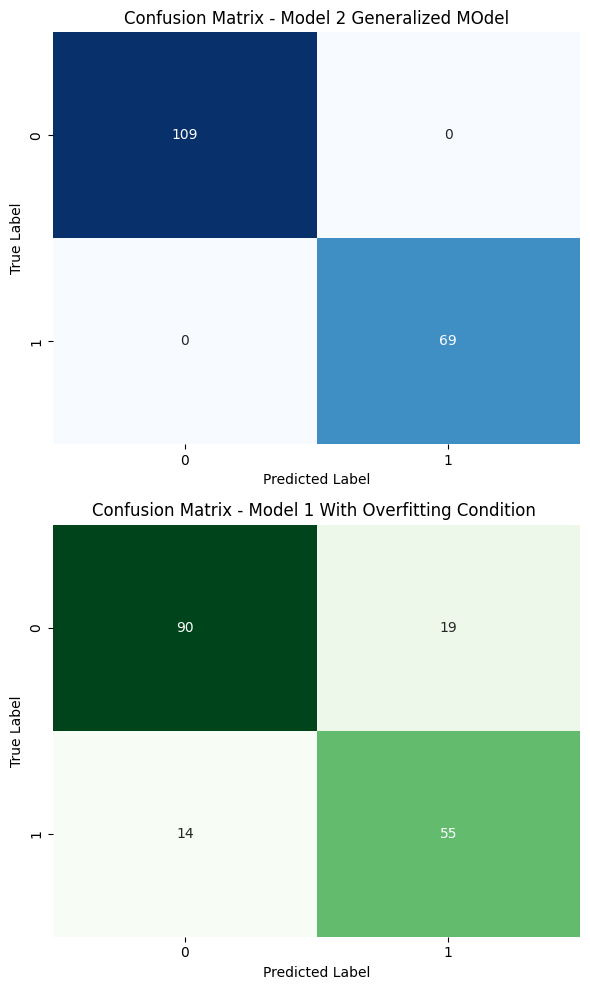

In [ ]:
# First confusion matrix
cm1 = confusion_matrix(y_test, y_pred)

# Second confusion matrix
cm2 = confusion_matrix(y_test, y_predictnew)

# Create subplots (2 rows, 1 column)
fig, axes = plt.subplots(2, 1, figsize=(6, 10))

# First heatmap with overfitting
sns.heatmap(cm2, annot=True, fmt='d', cmap="Greens", cbar=False, ax=axes[1])
axes[1].set_title("Confusion Matrix - Model 1 With Overfitting Condition ")
axes[1].set_xlabel("Predicted Label")
axes[1].set_ylabel("True Label")

print("------ ---------------------- ------  ----------------")

# 2nd  heatmap with Genralized
sns.heatmap(cm1, annot=True, fmt='d', cmap="Blues", cbar=False, ax=axes[0])
axes[0].set_title("Confusion Matrix - Model 2 Generalized MOdel")
axes[0].set_xlabel("Predicted Label")
axes[0].set_ylabel("True Label")



plt.tight_layout()
plt.show()
